## Load and Examine Data Relationships

### Subtask:
Load the four datasets (Beneficiary, Outpatient, Inpatient, and the main Train/Test data) into pandas DataFrames. Identify common columns (join keys) across datasets and understand their relationships and levels of granularity.


**Reasoning**:
The first step is to import the pandas library to enable data loading and manipulation. This is a foundational step before loading any data.



In [ ]:
import pandas as pd
print("pandas imported successfully.")

pandas imported successfully.


**Reasoning**:
Now that pandas is imported, the next step is to load all the specified CSV files into their respective DataFrames and then display the first few rows and summary information for each to understand their structure and content.



In [ ]:
train_df = pd.read_csv("/content/Train.csv")
test_df = pd.read_csv("/content/Test.csv")
train_beneficiary_df = pd.read_csv("/content/Train_Beneficiarydata.csv")
test_beneficiary_df = pd.read_csv("/content/Test_Beneficiarydata.csv")
train_outpatient_df = pd.read_csv("/content/Train_Outpatientdata.csv")
test_outpatient_df = pd.read_csv("/content/Test_Outpatientdata.csv")
train_inpatient_df = pd.read_csv("/content/Train_Inpatientdata.csv")
test_inpatient_df = pd.read_csv("/content/Test_Inpatientdata.csv")

print("--- train_df ---")
print(train_df.head())
print(train_df.info())

print("\n--- test_df ---")
print(test_df.head())
print(test_df.info())

print("\n--- train_beneficiary_df ---")
print(train_beneficiary_df.head())
print(train_beneficiary_df.info())

print("\n--- test_beneficiary_df ---")
print(test_beneficiary_df.head())
print(test_beneficiary_df.info())

print("\n--- train_outpatient_df ---")
print(train_outpatient_df.head())
print(train_outpatient_df.info())

print("\n--- test_outpatient_df ---")
print(test_outpatient_df.head())
print(test_outpatient_df.info())

print("\n--- train_inpatient_df ---")
print(train_inpatient_df.head())
print(train_inpatient_df.info())

print("\n--- test_inpatient_df ---")
print(test_inpatient_df.head())
print(test_inpatient_df.info())

--- train_df ---
   Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB
None

--- test_df ---
   Provider
0  PRV51002
1  PRV51006
2  PRV51009
3  PRV51010
4  PRV51018
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Provider  1353 non-null   object
dtypes: object(1)
memory usage: 10.7+ KB
None

--- train_beneficiary_df ---
      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN   

### Data Relationships and Granularity

Upon reviewing the `.head()` and `.info()` outputs for all loaded DataFrames, the following common columns and relationships have been identified:

**Common Columns (Join Keys):**

*   **`Provider`**: This column is present in `train_df`, `test_df`, `train_outpatient_df`, `test_outpatient_df`, `train_inpatient_df`, and `test_inpatient_df`. It serves as the primary identifier for providers.
*   **`BeneID`**: This column is found in `train_beneficiary_df`, `test_beneficiary_df`, `train_outpatient_df`, `test_outpatient_df`, `train_inpatient_df`, and `test_inpatient_df`. It acts as the primary identifier for beneficiaries.
*   **`ClaimID`**: This column is unique to the claims dataframes: `train_outpatient_df`, `test_outpatient_df`, `train_inpatient_df`, and `test_inpatient_df`. It represents a unique identifier for each claim.

**Data Relationships and Granularity:**

1.  **Provider Data (`train_df`, `test_df`):**
    *   **Granularity:** Provider-level. Each row represents a unique `Provider`.
    *   **Relationship:** These DataFrames provide the target variable (`PotentialFraud` in `train_df`) and can be joined with claim dataframes using the `Provider` column to link claims to their respective providers and their fraud status.

2.  **Beneficiary Data (`train_beneficiary_df`, `test_beneficiary_df`):**
    *   **Granularity:** Beneficiary-level. Each row represents a unique `BeneID`.
    *   **Relationship:** These DataFrames contain demographic and chronic condition information for beneficiaries. They can be joined with claim dataframes using the `BeneID` column to enrich claim records with beneficiary details.

3.  **Outpatient Claims Data (`train_outpatient_df`, `test_outpatient_df`):**
    *   **Granularity:** Claim-level (outpatient). Each row represents a unique outpatient `ClaimID`.
    *   **Relationship:** These DataFrames link `BeneID` to `Provider` for outpatient services. They can be joined with beneficiary data on `BeneID` and with provider data on `Provider`.

4.  **Inpatient Claims Data (`train_inpatient_df`, `test_inpatient_df`):**
    *   **Granularity:** Claim-level (inpatient). Each row represents a unique inpatient `ClaimID`.
    *   **Relationship:** Similar to outpatient claims, these DataFrames link `BeneID` to `Provider` for inpatient services. They can be joined with beneficiary data on `BeneID` and with provider data on `Provider`.

These identified common columns and relationships will be crucial for merging the datasets into a consolidated provider-level dataset for fraud detection in subsequent steps.

## Assess Data Quality and Completeness

### Subtask:
For each dataset, assess data quality by checking for missing values, duplicate entries, and inconsistent data types. Identify and summarize the extent of missingness and potential inconsistencies.


In [ ]:
# Create a dictionary that maps names to their corresponding DataFrames
dataframes = {
    "train_df": train_df,                         # Training claims dataset (combined)
    "test_df": test_df,                           # Testing claims dataset (combined)
    "train_beneficiary_df": train_beneficiary_df, # Training beneficiary-level dataset
    "test_beneficiary_df": test_beneficiary_df,   # Testing beneficiary-level dataset
    "train_outpatient_df": train_outpatient_df,   # Training outpatient claims dataset
    "test_outpatient_df": test_outpatient_df,     # Testing outpatient claims dataset
    "train_inpatient_df": train_inpatient_df,     # Training inpatient claims dataset
    "test_inpatient_df": test_inpatient_df        # Testing inpatient claims dataset
}

# Loop through each dataset in the dictionary
for name, df in dataframes.items():

    # Print a header showing which dataset is currently being analyzed
    print(f"\n--- Data Quality Report for {name} ---")

    # Print total number of rows in the dataset
    print(f"Total number of rows: {len(df)}")

    # Count missing (NaN) values for each column
    missing_values = df.isnull().sum()

    # Calculate missing values as a percentage of total rows
    missing_percentage = (missing_values / len(df)) * 100

    # Combine missing count and percentage into a DataFrame
    missing_df = pd.DataFrame({
        'Missing Count': missing_values,
        'Missing Percentage': missing_percentage
    })

    # Filter only the columns that have at least one missing value
    missing_df = missing_df[missing_df['Missing Count'] > 0]

    # Sort by number of missing values (descending)
    missing_df = missing_df.sort_values(by='Missing Count', ascending=False)

    # Display missing value summary if any exist
    if not missing_df.empty:
        print("\nMissing values per column:")
        print(missing_df)  # Print the DataFrame with missing information
    else:
        print("\nNo missing values found.")  # Message for datasets without missing values

    # Count duplicate rows in the dataset
    duplicate_rows_count = df.duplicated().sum()

    # If duplicates exist, print the count
    if duplicate_rows_count > 0:
        print(f"\nNumber of duplicate rows: {duplicate_rows_count}")
    else:
        print("\nNo duplicate rows found.")  # Message when no duplicates exist

    # Provide reminders to manually review data types using df.info()
    print("\nReview data types using .info() output from previous step for potential inconsistencies.")

    # Suggest specific columns that commonly need type correction
    print("Example: Date columns (e.g., ClaimStartDt, ClaimEndDt, DOB, DOD, AdmissionDt, DischargeDt) should be datetime objects.")
    print("Example: 'RenalDiseaseIndicator' or 'ClmProcedureCode_' columns might need type conversion if they are not appropriate for their values.")



--- Data Quality Report for train_df ---
Total number of rows: 5410

No missing values found.

No duplicate rows found.

Review data types using .info() output from previous step for potential inconsistencies.
Example: Date columns (e.g., ClaimStartDt, ClaimEndDt, DOB, DOD, AdmissionDt, DischargeDt) should be datetime objects.
Example: 'RenalDiseaseIndicator' or 'ClmProcedureCode_' columns might need type conversion if they are not appropriate for their values.

--- Data Quality Report for test_df ---
Total number of rows: 1353

No missing values found.

No duplicate rows found.

Review data types using .info() output from previous step for potential inconsistencies.
Example: Date columns (e.g., ClaimStartDt, ClaimEndDt, DOB, DOD, AdmissionDt, DischargeDt) should be datetime objects.
Example: 'RenalDiseaseIndicator' or 'ClmProcedureCode_' columns might need type conversion if they are not appropriate for their values.

--- Data Quality Report for train_beneficiary_df ---
Total number 

### Summary of Data Quality Assessment

**1. Missing Values:**
*   **`train_beneficiary_df` and `test_beneficiary_df`:** The `DOD` (Date of Death) column has a very high percentage of missing values (approximately 99%). This is expected, as most beneficiaries would still be alive. This column will require careful handling if used for analysis, or it can be used to infer whether a beneficiary is alive or deceased.
*   **`train_outpatient_df`, `test_outpatient_df`, `train_inpatient_df`, and `test_inpatient_df`:**
    *   **High Missingness (over 80-90%):** `ClmProcedureCode_X` (especially `ClmProcedureCode_4`, `5`, `6` which are almost 100% missing), `ClmDiagnosisCode_10`, `ClmDiagnosisCode_9`, `ClmDiagnosisCode_8`, `ClmDiagnosisCode_7`, `ClmDiagnosisCode_6`, `ClmDiagnosisCode_5`, `OperatingPhysician`, `OtherPhysician`, and `ClmAdmitDiagnosisCode`. These columns have very little data and might be suitable for removal or advanced imputation strategies if their information is deemed critical.
    *   **Moderate Missingness (2-80%):** `ClmDiagnosisCode_4`, `ClmDiagnosisCode_3`, `ClmDiagnosisCode_2`. These are still significant but contain more information than the highly missing columns.
    *   **Low Missingness (< 1%):** `AttendingPhysician` (in outpatient and inpatient claims), `DeductibleAmtPaid` (in inpatient claims). These columns are largely complete and easier to handle (e.g., with simple imputation or treating missingness as a category).

**2. Duplicate Rows:**
*   No duplicate rows were found in any of the DataFrames. This indicates good data integrity in terms of unique record identification within each dataset.

**3. Inconsistent Data Types / Type Conversion Needs:**
*   **Date Columns:** `DOB`, `DOD` (in beneficiary data), `ClaimStartDt`, `ClaimEndDt`, `AdmissionDt`, `DischargeDt` (in claims data) are currently of `object` dtype. These should be converted to `datetime` objects for proper time-series analysis, calculation of age, length of stay, etc.
*   **`RenalDiseaseIndicator`:** In `train_beneficiary_df` and `test_beneficiary_df`, this column is of `object` dtype. Looking at `head()` output, it contains '0' and 'Y'. This suggests it might need to be converted to a numerical (0/1) or boolean type after handling the 'Y' value.
*   **`ClmProcedureCode_X`:** These columns (e.g., `ClmProcedureCode_1` to `6`) are of `float64` dtype in the claims dataframes. Given they represent procedure codes, they are likely categorical or identifiers, not numerical values. They should either be converted to `object`/`string` type or handled as categorical features, especially considering their high missingness and the specific values they might hold (e.g., non-numeric codes).
*   **`DiagnosisGroupCode`:** In inpatient data, this column is of `object` dtype. Similar to procedure codes, these are likely categorical identifiers and should be treated as such.

**Next Steps based on Assessment:**
*   Convert identified date columns to `datetime` objects.
*   Address the `RenalDiseaseIndicator` type inconsistency.
*   Consider the implications of high missingness in diagnosis and procedure codes, and physician IDs. Decisions will need to be made on imputation, feature engineering (e.g., counting number of diagnoses/procedures), or dropping columns/rows based on analytical goals.
*   Further investigate the nature of `ClmProcedureCode_X` and `DiagnosisGroupCode` values to confirm appropriate type handling.

## Exploratory Analysis of Beneficiaries, Claims, and Providers

### Subtask:
Perform initial exploratory data analysis (EDA) on each of the core entities: beneficiaries, claims (inpatient and outpatient), and providers. This includes descriptive statistics (mean, median, std, min, max, counts) for numerical features, and frequency distributions for categorical features, to uncover patterns, distributions, and outliers within each dataset.


**Reasoning**:
The previous step identified missing values and data types. Now, following the instructions, the first task is to convert date columns to datetime objects and handle the inconsistent 'RenalDiseaseIndicator' column in the beneficiary dataframes by replacing 'Y' with '1' and converting it to numeric. This ensures correct data types for subsequent analysis.



In [ ]:
# ============================================================
# CONVERT DATE COLUMNS AND CLEAN INDICATOR COLUMNS
# For Beneficiary, Outpatient, and Inpatient datasets
# ============================================================

# List of date columns found in beneficiary datasets
date_cols_beneficiary = ['DOB', 'DOD']

# Loop through both beneficiary datasets (train & test)
for df_name in ['train_beneficiary_df', 'test_beneficiary_df']:

    df = dataframes[df_name]   # Retrieve the DataFrame by name

    # Convert each beneficiary date column to datetime format
    for col in date_cols_beneficiary:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        # errors='coerce' converts invalid strings to NaT instead of raising errors

    # ------------------------------------------------------------
    # Handle RenalDiseaseIndicator column
    # ------------------------------------------------------------
    if 'RenalDiseaseIndicator' in df.columns:  # Check that column exists
        # Replace 'Y' with '1' and convert the column to integer
        df['RenalDiseaseIndicator'] = df['RenalDiseaseIndicator'].replace('Y', '1').astype(int)

    # Print updated dtypes for verification
    print(f"--- {df_name} data types after conversion ---")
    print(df[date_cols_beneficiary + ['RenalDiseaseIndicator']].info(verbose=False, memory_usage=False))


# ============================================================
# DATE CONVERSION FOR CLAIMS TABLES
# (Outpatient + Inpatient datasets)
# ============================================================

# List of date columns found in claims datasets
date_cols_claims = ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt']

# Loop through all train/test outpatient & inpatient DataFrames
for df_name in ['train_outpatient_df', 'test_outpatient_df',
                'train_inpatient_df', 'test_inpatient_df']:

    df = dataframes[df_name]  # Retrieve the DataFrame

    # Convert each claims date column to datetime if it exists in the DataFrame
    for col in date_cols_claims:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
            # Converts invalid dates to NaT without breaking the script

    # Print updated dtypes for only the existing date columns
    print(f"--- {df_name} data types after conversion ---")
    print(df[[col for col in date_cols_claims if col in df.columns]].info(verbose=False, memory_usage=False))


--- train_beneficiary_df data types after conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Columns: 3 entries, DOB to RenalDiseaseIndicator
dtypes: datetime64[ns](2), int64(1)None
--- test_beneficiary_df data types after conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63968 entries, 0 to 63967
Columns: 3 entries, DOB to RenalDiseaseIndicator
dtypes: datetime64[ns](2), int64(1)None
--- train_outpatient_df data types after conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Columns: 2 entries, ClaimStartDt to ClaimEndDt
dtypes: datetime64[ns](2)None
--- test_outpatient_df data types after conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125841 entries, 0 to 125840
Columns: 2 entries, ClaimStartDt to ClaimEndDt
dtypes: datetime64[ns](2)None
--- train_inpatient_df data types after conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Col

**Reasoning**:
Now that the data types are correct for the beneficiary data, I will calculate descriptive statistics for numerical columns and frequency distributions for categorical columns in both `train_beneficiary_df` and `test_beneficiary_df` to understand their distributions and patterns, as per instruction 3.



In [ ]:
# ============================================================
# BENEFICIARY DATA ANALYSIS: DESCRIPTIVE STATISTICS + FREQUENCY DISTRIBUTIONS
# ============================================================

# Dictionary containing the beneficiary DataFrames (train and test)
beneficiary_dfs = {
    "train_beneficiary_df": dataframes["train_beneficiary_df"],   # Training beneficiary dataset
    "test_beneficiary_df": dataframes["test_beneficiary_df"]      # Testing beneficiary dataset
}

# List of numerical columns to compute descriptive statistics
numerical_cols_beneficiary = [
    'NoOfMonths_PartACov',            # Number of months Part A coverage
    'NoOfMonths_PartBCov',            # Number of months Part B coverage
    'IPAnnualReimbursementAmt',       # Inpatient annual reimbursement amount
    'IPAnnualDeductibleAmt',          # Inpatient annual deductible amount
    'OPAnnualReimbursementAmt',       # Outpatient annual reimbursement amount
    'OPAnnualDeductibleAmt'           # Outpatient annual deductible amount
]

# List of categorical columns to compute frequency distributions
categorical_cols_beneficiary = [
    'Gender',                         # Beneficiary gender
    'Race',                           # Beneficiary race
    'State',                          # State ID
    'County',                         # County ID
    'RenalDiseaseIndicator',          # Renal disease status (binary)
    'ChronicCond_Alzheimer',          # Alzheimer's chronic condition indicator
    'ChronicCond_Heartfailure',       # Heart failure indicator
    'ChronicCond_KidneyDisease',      # Kidney disease indicator
    'ChronicCond_Cancer',             # Cancer indicator
    'ChronicCond_ObstrPulmonary',     # COPD indicator
    'ChronicCond_Depression',         # Depression indicator
    'ChronicCond_Diabetes',           # Diabetes indicator
    'ChronicCond_IschemicHeart',      # Ischemic heart disease indicator
    'ChronicCond_Osteoporasis',       # Osteoporosis indicator
    'ChronicCond_rheumatoidarthritis',# Rheumatoid arthritis indicator
    'ChronicCond_stroke'              # Stroke indicator
]

# Header for clarity
print("### Beneficiary Data Analysis ###")

# Loop through train and test beneficiary datasets
for name, df in beneficiary_dfs.items():

    # ------------------------------------------------------------
    # DESCRIPTIVE STATISTICS (Numerical Columns)
    # ------------------------------------------------------------
    print(f"\n--- Descriptive Statistics for {name} (Numerical Columns) ---")
    # .describe() provides count, mean, std, min, max, quartiles
    print(df[numerical_cols_beneficiary].describe())

    # ------------------------------------------------------------
    # FREQUENCY DISTRIBUTIONS (Categorical Columns)
    # ------------------------------------------------------------
    print(f"\n--- Frequency Distributions for {name} (Categorical Columns) ---")

    # Loop through each categorical column and print value frequencies
    for col in categorical_cols_beneficiary:
        print(f"\n--- {col} ---")
        # .value_counts(normalize=True) gives percentage distribution
        print(df[col].value_counts(normalize=True).head())  # Show top categories


### Beneficiary Data Analysis ###

--- Descriptive Statistics for train_beneficiary_df (Numerical Columns) ---
       NoOfMonths_PartACov  NoOfMonths_PartBCov  IPAnnualReimbursementAmt  \
count        138556.000000        138556.000000             138556.000000   
mean             11.907727            11.910145               3660.346502   
std               1.032332             0.936893               9568.621827   
min               0.000000             0.000000              -8000.000000   
25%              12.000000            12.000000                  0.000000   
50%              12.000000            12.000000                  0.000000   
75%              12.000000            12.000000               2280.000000   
max              12.000000            12.000000             161470.000000   

       IPAnnualDeductibleAmt  OPAnnualReimbursementAmt  OPAnnualDeductibleAmt  
count          138556.000000             138556.000000          138556.000000  
mean              399.847296       

**Reasoning**:
Continuing with the EDA, I will now calculate descriptive statistics for the numerical columns and identify the top 10 most frequent 'ClmDiagnosisCode_1' values for all claims dataframes (`train_outpatient_df`, `test_outpatient_df`, `train_inpatient_df`, and `test_inpatient_df`), as specified in instruction 4.



In [ ]:
# ============================================================
# CLAIMS DATA ANALYSIS: NUMERICAL STATS + TOP DIAGNOSIS CODES
# ============================================================

# Dictionary mapping names to outpatient & inpatient train/test DataFrames
claims_dfs = {
    "train_outpatient_df": dataframes["train_outpatient_df"],  # Outpatient claims (train set)
    "test_outpatient_df": dataframes["test_outpatient_df"],    # Outpatient claims (test set)
    "train_inpatient_df": dataframes["train_inpatient_df"],    # Inpatient claims (train set)
    "test_inpatient_df": dataframes["test_inpatient_df"]       # Inpatient claims (test set)
}

# Numerical columns to evaluate in claims datasets
numerical_cols_claims = [
    'InscClaimAmtReimbursed',  # Amount reimbursed by insurer
    'DeductibleAmtPaid'        # Deductible amount paid by the beneficiary
]

print("\n### Claims Data Analysis ###")

# Loop through each claims DataFrame
for name, df in claims_dfs.items():

    # ------------------------------------------------------------
    # NUMERICAL DESCRIPTIVE STATISTICS
    # ------------------------------------------------------------
    print(f"\n--- Descriptive Statistics for {name} (Numerical Columns) ---")

    # Convert DeductibleAmtPaid to numeric (in case of string entries)
    df['DeductibleAmtPaid'] = pd.to_numeric(df['DeductibleAmtPaid'], errors='coerce')
    # errors='coerce' ensures invalid values become NaN instead of crashing

    # Print summary statistics for numerical columns
    print(df[numerical_cols_claims].describe())

    # ------------------------------------------------------------
    # TOP DIAGNOSIS CODES (ClmDiagnosisCode_1)
    # ------------------------------------------------------------
    print(f"\n--- Top 10 ClmDiagnosisCode_1 for {name} ---")

    # Check if the diagnosis code column exists in the DataFrame
    if 'ClmDiagnosisCode_1' in df.columns:
        # Print the top 10 most frequent diagnosis codes
        print(df['ClmDiagnosisCode_1'].value_counts().head(10))
    else:
        print("ClmDiagnosisCode_1 not found in this dataframe.")  # Fallback message



### Claims Data Analysis ###

--- Descriptive Statistics for train_outpatient_df (Numerical Columns) ---
       InscClaimAmtReimbursed  DeductibleAmtPaid
count           517737.000000      517737.000000
mean               286.334799           2.779233
std                694.034343          15.785839
min                  0.000000           0.000000
25%                 40.000000           0.000000
50%                 80.000000           0.000000
75%                200.000000           0.000000
max             102500.000000         897.000000

--- Top 10 ClmDiagnosisCode_1 for train_outpatient_df ---
ClmDiagnosisCode_1
4019     13803
4011     12512
2724      3603
2720      3209
2722      3028
2721      2998
2723      2995
78651     2251
78659     2181
78650     2179
Name: count, dtype: int64

--- Descriptive Statistics for test_outpatient_df (Numerical Columns) ---
       InscClaimAmtReimbursed  DeductibleAmtPaid
count           125841.000000      125841.000000
mean               288.820

**Reasoning**:
To complete the EDA for the providers, I will now calculate the frequency distribution of the 'PotentialFraud' column in the `train_df` as specified in instruction 5.



In [ ]:
# ============================================================
# PROVIDER DATA ANALYSIS: TARGET VARIABLE DISTRIBUTION
# ============================================================

print("\n### Provider Data Analysis ###")

print("\n--- Frequency Distribution for train_df (PotentialFraud) ---")

# Compute and print the relative frequency (percentage) of each class:
#  - 'Yes'     → provider labeled as fraudulent
#  - 'No'      → provider labeled as legitimate
# normalize=True gives proportions instead of raw counts
print(dataframes["train_df"]['PotentialFraud'].value_counts(normalize=True))



### Provider Data Analysis ###

--- Frequency Distribution for train_df (PotentialFraud) ---
PotentialFraud
No     0.90647
Yes    0.09353
Name: proportion, dtype: float64


## Compare Fraudulent vs. Legitimate Providers

### Subtask:
Prepare a unified dataset for training by merging claims, beneficiary, and provider data, and then perform initial provider-level aggregations to compare characteristics of fraudulent versus legitimate providers.


**Reasoning**:
The first step is to combine the training outpatient and inpatient claims into a single DataFrame to consolidate all claim information for the training set, as specified in instruction 1.



In [ ]:
# ============================================================
# MERGE OUTPATIENT AND INPATIENT TRAINING CLAIMS DATA
# ============================================================

# Concatenate outpatient and inpatient training DataFrames
# ignore_index=True → reset row index after combining
# sort=False → keep columns in their original order (no alphabetical sorting)
train_claims_df = pd.concat(
    [train_outpatient_df, train_inpatient_df],
    ignore_index=True,
    sort=False
)

# Print the shape of outpatient training claims
print("Shape of train_outpatient_df:", train_outpatient_df.shape)

# Print the shape of inpatient training claims
print("Shape of train_inpatient_df:", train_inpatient_df.shape)

# Print the shape of the combined training claims DataFrame
print("Shape of train_claims_df after concatenation:", train_claims_df.shape)

# Display the first 5 rows to verify merge correctness
print("First 5 rows of train_claims_df:")
print(train_claims_df.head())


Shape of train_outpatient_df: (517737, 27)
Shape of train_inpatient_df: (40474, 30)
Shape of train_claims_df after concatenation: (558211, 30)
First 5 rows of train_claims_df:
      BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11 2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12 2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27 2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06 2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22 2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ClmProcedureC

**Reasoning**:
Now that the claims data is consolidated, the next logical step is to merge this `train_claims_df` with the `train_beneficiary_df` using the common column `BeneID` to enrich the claim records with beneficiary details, as instructed in step 2.



In [ ]:
# ============================================================
# MERGE CLAIMS DATA WITH BENEFICIARY INFORMATION
# ============================================================

# Merge the combined training claims DataFrame with the training beneficiary dataset
# on='BeneID' → match each claim with the correct beneficiary record
# how='left' → keep ALL rows from train_claims_df, even if some BeneID values
#              do not have a corresponding beneficiary record (prevents claim-loss)
train_claims_beneficiary_df = pd.merge(
    train_claims_df,         # Left DataFrame (claims)
    train_beneficiary_df,    # Right DataFrame (beneficiary data)
    on='BeneID',             # Join key
    how='left'               # Preserve all claims
)

# Print the resulting shape after merging
print("Shape of train_claims_beneficiary_df after merging with beneficiary data:",
      train_claims_beneficiary_df.shape)

# Display the first five rows to inspect merge correctness
print("First 5 rows of train_claims_beneficiary_df:")
print(train_claims_beneficiary_df.head())


Shape of train_claims_beneficiary_df after merging with beneficiary data: (558211, 54)
First 5 rows of train_claims_beneficiary_df:
      BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11 2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12 2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27 2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06 2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22 2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ChronicCond_Depression  \
0            NaN              7

**Reasoning**:
Following the previous merge, I will now merge the `train_claims_beneficiary_df` with `train_df` using the `Provider` column to incorporate the 'PotentialFraud' status into the unified dataset, as per instruction 3.



In [ ]:
# ============================================================
# MERGE CLAIMS + BENEFICIARY DATA WITH PROVIDER-LEVEL LABELS
# ============================================================

# Merge the claims-beneficiary dataset with the provider dataset (train_df)
# on='Provider' → attach provider-level fraud labels to each claim
# how='left' → keep ALL claim records, even if some providers have missing labels
train_full_df = pd.merge(
    train_claims_beneficiary_df,   # Left DataFrame (claims + beneficiary info)
    train_df,                      # Right DataFrame (provider-level data with PotentialFraud)
    on='Provider',                 # Join key
    how='left'                     # Keep all claim-level rows
)

# Print resulting shape after merging provider information
print("Shape of train_full_df after merging with provider data:",
      train_full_df.shape)

# Display the first five rows for verification
print("First 5 rows of train_full_df:")
print(train_full_df.head())


Shape of train_full_df after merging with provider data: (558211, 55)
First 5 rows of train_full_df:
      BeneID    ClaimID ClaimStartDt ClaimEndDt  Provider  \
0  BENE11002  CLM624349   2009-10-11 2009-10-11  PRV56011   
1  BENE11003  CLM189947   2009-02-12 2009-02-12  PRV57610   
2  BENE11003  CLM438021   2009-06-27 2009-06-27  PRV57595   
3  BENE11004  CLM121801   2009-01-06 2009-01-06  PRV56011   
4  BENE11004  CLM150998   2009-01-22 2009-01-22  PRV56011   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                      30          PHY326117                NaN   
1                      80          PHY362868                NaN   
2                      10          PHY328821                NaN   
3                      40          PHY334319                NaN   
4                     200          PHY403831                NaN   

  OtherPhysician ClmDiagnosisCode_1  ... ChronicCond_Diabetes  \
0            NaN              78943  ...                    2   

**Reasoning**:
Now that the training data is fully merged into `train_full_df`, I will group it by `Provider` and `PotentialFraud` and calculate the specified aggregated features, such as claim counts, total/average reimbursement amounts, total deductible paid, and counts of unique beneficiaries and physicians, as per instruction 4.



In [ ]:
# ============================================================
# PROVIDER-LEVEL AGGREGATION OF CLAIMS + BENEFICIARY DATA
# ============================================================

# Group the combined training dataset (train_full_df) by:
#   - Provider            → each unique provider ID
#   - PotentialFraud      → fraud label for that provider
#
# Then compute several aggregated metrics to create a single
# provider-level record used for modeling.
provider_aggregated_df = train_full_df.groupby(
    ['Provider', 'PotentialFraud']   # Grouping keys
).agg(
    # Total number of claims submitted by the provider
    total_claims=('ClaimID', 'count'),

    # Total reimbursed amount across all claims
    total_reimbursed_amount=('InscClaimAmtReimbursed', 'sum'),

    # Average reimbursement per claim (indicator of billing patterns)
    avg_reimbursed_amount_per_claim=('InscClaimAmtReimbursed', 'mean'),

    # Total deductible amount paid by all beneficiaries for this provider
    total_deductible_paid=('DeductibleAmtPaid', 'sum'),

    # Count of unique beneficiaries associated with this provider
    num_unique_beneficiaries=('BeneID', 'nunique'),

    # Number of distinct attending physicians appearing in the provider's claims
    num_unique_attending_physicians=('AttendingPhysician', 'nunique'),

    # Number of distinct operating physicians used by this provider
    num_unique_operating_physicians=('OperatingPhysician', 'nunique'),

    # Number of distinct "other physicians" appearing in claims
    num_unique_other_physicians=('OtherPhysician', 'nunique')
).reset_index()   # Reset index so Provider becomes a normal column

# Print the shape of the resulting provider-level dataset
print("Shape of provider_aggregated_df:", provider_aggregated_df.shape)

# Display the first 5 rows for inspection
print("First 5 rows of provider_aggregated_df:")
print(provider_aggregated_df.head())


Shape of provider_aggregated_df: (5410, 10)
First 5 rows of provider_aggregated_df:
   Provider PotentialFraud  total_claims  total_reimbursed_amount  \
0  PRV51001             No            25                   104640   
1  PRV51003            Yes           132                   605670   
2  PRV51004             No           149                    52170   
3  PRV51005            Yes          1165                   280910   
4  PRV51007             No            72                    33710   

   avg_reimbursed_amount_per_claim  total_deductible_paid  \
0                      4185.600000                 5340.0   
1                      4588.409091                66286.0   
2                       350.134228                  310.0   
3                       241.124464                 3700.0   
4                       468.194444                 3264.0   

   num_unique_beneficiaries  num_unique_attending_physicians  \
0                        24                               14   
1     

**Reasoning**:
Following the aggregation, I will now separate the `provider_aggregated_df` into two DataFrames: one for fraudulent providers and one for legitimate providers, based on the 'PotentialFraud' column, as specified in instruction 5. Then, for both of these separated DataFrames, I will calculate and print descriptive statistics for the numerical features, as per instruction 6.



In [ ]:
# ============================================================
# SPLIT PROVIDERS INTO FRAUDULENT VS LEGITIMATE
# AND GENERATE DESCRIPTIVE STATISTICS
# ============================================================

# Filter the provider_aggregated_df to include only rows
# where PotentialFraud == 'Yes'
# Drop the 'PotentialFraud' column since it's no longer needed
fraudulent_providers_df = provider_aggregated_df[
    provider_aggregated_df['PotentialFraud'] == 'Yes'
].drop(columns=['PotentialFraud'])

# Filter legitimate providers where PotentialFraud == 'No'
# Also drop the label column
legitimate_providers_df = provider_aggregated_df[
    provider_aggregated_df['PotentialFraud'] == 'No'
].drop(columns=['PotentialFraud'])

# ------------------------------------------------------------
# STATISTICAL SUMMARY FOR FRAUDULENT PROVIDERS
# ------------------------------------------------------------
print("\n--- Descriptive Statistics for Fraudulent Providers ---")
# .describe() returns summary metrics such as count, mean, std,
# min, max, and quartiles for all numerical columns
print(fraudulent_providers_df.describe())

# ------------------------------------------------------------
# STATISTICAL SUMMARY FOR LEGITIMATE PROVIDERS
# ------------------------------------------------------------
print("\n--- Descriptive Statistics for Legitimate Providers ---")
print(legitimate_providers_df.describe())



--- Descriptive Statistics for Fraudulent Providers ---
       total_claims  total_reimbursed_amount  avg_reimbursed_amount_per_claim  \
count    506.000000             5.060000e+02                       506.000000   
mean     420.545455             5.843500e+05                      3842.795104   
std      722.734485             6.446685e+05                      3812.441727   
min        1.000000             2.000000e+02                        73.333333   
25%       62.000000             1.729475e+05                       857.060232   
50%      155.500000             3.734500e+05                      2576.480084   
75%      432.000000             7.597400e+05                      5759.702813   
max     8240.000000             5.996050e+06                     22333.333333   

       total_deductible_paid  num_unique_beneficiaries  \
count             506.000000                506.000000   
mean            49360.219368                242.021739   
std             62124.826429           

## Define Aggregation Strategy and Consolidate Data

### Subtask:
Develop and implement an aggregation strategy to transform claim-level information into provider-level records, which will serve as the modeling unit. Calculate appropriate statistical summaries (e.g., total claim counts, average claim amounts, ratios of specific claim types, percentages of beneficiaries from certain demographics) for both inpatient and outpatient data, ensuring consistency across these data sources to create a unified provider-level dataset.


**Reasoning**:
Following the instructions, I need to calculate the age of each beneficiary. The `DOB` column is already in datetime format. I will calculate `BeneAge` in `train_full_df` using the specified reference date '2009-12-31'.



In [ ]:
# ============================================================
# CALCULATE BENEFICIARY AGE AS OF A REFERENCE DATE
# ============================================================

# Convert the fixed reference date (end of 2009) to a datetime object
# This is used to compute each beneficiary's age at that time.
reference_date = pd.to_datetime('2009-12-31')

# Compute age for each beneficiary in the train_full_df
# Steps:
# 1. reference_date - DOB        → returns a timedelta (number of days)
# 2. .dt.days / 365.25           → convert days to years (using 365.25 for leap-year accuracy)
# 3. .astype(int)                → convert to integer age
train_full_df['BeneAge'] = (
    (reference_date - train_full_df['DOB']).dt.days / 365.25
).astype(int)

# Display first 5 rows with BeneID, DOB, and the newly calculated BeneAge column
print("First 5 rows of train_full_df with new BeneAge column:")
print(train_full_df[['BeneID', 'DOB', 'BeneAge']].head())


First 5 rows of train_full_df with new BeneAge column:
      BeneID        DOB  BeneAge
0  BENE11002 1936-09-01       73
1  BENE11003 1936-08-01       73
2  BENE11003 1936-08-01       73
3  BENE11004 1922-07-01       87
4  BENE11004 1922-07-01       87


**Reasoning**:
As per the second instruction, I will create a new boolean column `IsInpatient` in `train_full_df` based on whether the `AdmissionDt` column is null or not. This will distinguish inpatient claims from outpatient claims.



In [ ]:
# ============================================================
# FLAG WHETHER A CLAIM IS INPATIENT OR OUTPATIENT
# ============================================================

# Create a new boolean column 'IsInpatient'
# Explanation:
# - In inpatient claims, the column 'AdmissionDt' contains a valid date.
# - In outpatient claims, 'AdmissionDt' is NULL (NaT).
# So: .notnull() → True for inpatient, False for outpatient.
train_full_df['IsInpatient'] = train_full_df['AdmissionDt'].notnull()

# Display the first 5 rows to verify the new column
print("First 5 rows of train_full_df with new IsInpatient column:")
print(train_full_df[['ClaimID', 'AdmissionDt', 'IsInpatient']].head())


First 5 rows of train_full_df with new IsInpatient column:
     ClaimID AdmissionDt  IsInpatient
0  CLM624349         NaT        False
1  CLM189947         NaT        False
2  CLM438021         NaT        False
3  CLM121801         NaT        False
4  CLM150998         NaT        False


**Reasoning**:
To augment the `provider_aggregated_df` with additional features as instructed, I will first calculate claim-level and beneficiary-level statistics from `train_full_df`. This involves calculating total inpatient/outpatient claims, average beneficiary age, and the number of unique diagnosis and procedure codes per provider. For beneficiary-specific proportions (e.g., male, renal disease, chronic conditions), I will perform a sub-aggregation on unique beneficiaries per provider to ensure accurate proportions. Finally, I will merge these new features into the existing `provider_aggregated_df` and compute the inpatient claim ratio.



In [ ]:
# ============================================================
# FEATURE ENGINEERING — AUGMENT PROVIDER-LEVEL FEATURES
# ============================================================

# ------------------------------------------------------------
# Identify all chronic condition columns dynamically
# These columns start with "ChronicCond_" and belong to beneficiary data
# ------------------------------------------------------------
chronic_cond_cols = [col for col in train_full_df.columns if col.startswith('ChronicCond_')]


# ============================================================
# STEP 1: AGGREGATE CLAIM-LEVEL FEATURES (per Provider)
# ============================================================

provider_claim_agg = train_full_df.groupby(['Provider', 'PotentialFraud']).agg(

    # Total inpatient claims → boolean True counts as 1, False as 0
    total_inpatient_claims=('IsInpatient', lambda x: x.sum()),

    # Total outpatient claims → count cases where IsInpatient is False
    total_outpatient_claims=('IsInpatient', lambda x: (~x).sum()),

    # Average beneficiary age across all claims associated with this provider
    avg_beneficiary_age=('BeneAge', 'mean'),

    # Number of distinct primary diagnosis codes used by this provider
    num_unique_diagnosis_codes=('ClmDiagnosisCode_1', 'nunique'),

    # Number of distinct procedure codes used
    num_unique_procedure_codes=('ClmProcedureCode_1', 'nunique')

).reset_index()


# ============================================================
# STEP 2: AGGREGATE BENEFICIARY-LEVEL FEATURES (per Provider)
# ============================================================

# First: Create a dataset of unique beneficiaries per provider
# We keep the *first* occurrence of each beneficiary’s characteristics
unique_bene_per_provider = train_full_df.groupby(
    ['Provider', 'PotentialFraud', 'BeneID']
).agg(
    Gender=('Gender', 'first'),                                 # Beneficiary gender
    RenalDiseaseIndicator=('RenalDiseaseIndicator', 'first'),   # Renal disease indicator

    # Include all chronic condition columns
    **{col: (col, 'first') for col in chronic_cond_cols}

).reset_index()

# Second: Calculate proportions of conditions among beneficiaries of each provider
bene_proportions_agg = unique_bene_per_provider.groupby(
    ['Provider', 'PotentialFraud']
).agg(

    # Proportion of male beneficiaries
    prop_male_beneficiaries=('Gender', lambda x: (x == 1).sum() / len(x)),

    # Proportion of beneficiaries with renal disease
    prop_renal_disease=('RenalDiseaseIndicator', lambda x: (x == 1).sum() / len(x)),

    # Proportions for each chronic condition (dynamically generated)
    **{
        f'prop_{col.lower()}': (col, lambda x: (x == 1).sum() / len(x))
        for col in chronic_cond_cols
    }

).reset_index()


# ============================================================
# STEP 3: MERGE ALL NEW AGGREGATIONS INTO provider_aggregated_df
# ============================================================

# Merge claim-level aggregations (Step 1)
provider_aggregated_df = pd.merge(
    provider_aggregated_df,      # Base provider-level dataset
    provider_claim_agg,          # Claim-level aggregated features
    on=['Provider', 'PotentialFraud'],
    how='left'
)

# Merge beneficiary-level aggregations (Step 2)
provider_aggregated_df = pd.merge(
    provider_aggregated_df,      # Updated provider dataset
    bene_proportions_agg,        # Beneficiary-level proportions
    on=['Provider', 'PotentialFraud'],
    how='left'
)


# ------------------------------------------------------------
# Additional derived feature: Inpatient claim ratio
# (Fraction of claims that are inpatient)
# ------------------------------------------------------------
provider_aggregated_df['inpatient_claim_ratio'] = (
    provider_aggregated_df['total_inpatient_claims'] /
    provider_aggregated_df['total_claims']
)


# ============================================================
# DISPLAY UPDATED DATASET
# ============================================================

print("Shape of provider_aggregated_df after augmenting:", provider_aggregated_df.shape)

print("First 5 rows of augmented provider_aggregated_df:")
print(provider_aggregated_df.head())

# ============================================================
# CREATE NUMERIC FRAUD LABEL FOR MODELING
# ============================================================

provider_aggregated_df['PotentialFraud_numeric'] = \
    provider_aggregated_df['PotentialFraud'].map({'No': 0, 'Yes': 1})

print(provider_aggregated_df[['Provider', 'PotentialFraud', 'PotentialFraud_numeric']].head())



Shape of provider_aggregated_df after augmenting: (5410, 29)
First 5 rows of augmented provider_aggregated_df:
   Provider PotentialFraud  total_claims  total_reimbursed_amount  \
0  PRV51001             No            25                   104640   
1  PRV51003            Yes           132                   605670   
2  PRV51004             No           149                    52170   
3  PRV51005            Yes          1165                   280910   
4  PRV51007             No            72                    33710   

   avg_reimbursed_amount_per_claim  total_deductible_paid  \
0                      4185.600000                 5340.0   
1                      4588.409091                66286.0   
2                       350.134228                  310.0   
3                       241.124464                 3700.0   
4                       468.194444                 3264.0   

   num_unique_beneficiaries  num_unique_attending_physicians  \
0                        24                

## Generate Core Visualizations

### Subtask:
Generate a plot to visualize the target class distribution (fraud vs. non-fraud provider counts).


### 1.5.1 Data Understanding & Exploration

A thorough understanding of the dataset is essential before building predictive models. In this step,
we explore the structure, distribution, and statistical characteristics of the data to identify key
patterns relevant to fraud detection. We produce core visualizations including the distribution of the
target variable (PotentialFraud), claim amount trends, provider-level summaries, feature correlations,
and geographic or temporal patterns. These exploratory insights help highlight unusual behavior, detect
outliers, uncover dependencies between variables, and guide feature engineering choices in later
modeling steps.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Seaborn and Matplotlib imported successfully.")

Seaborn and Matplotlib imported successfully.


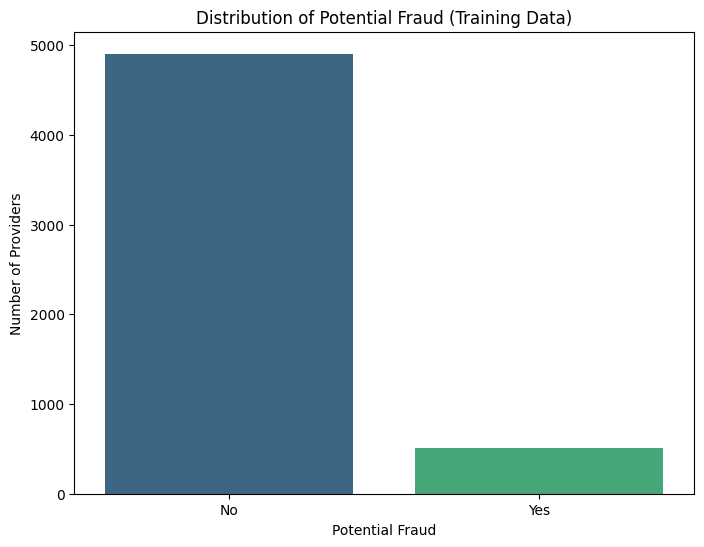

In [ ]:
# ============================================================
# TARGET CLASS DISTRIBUTION
# ============================================================

plt.figure(figsize=(8, 6))
sns.countplot(
    x='PotentialFraud',
    data=provider_aggregated_df,
    palette='viridis',
    hue='PotentialFraud',
    legend=False
)
plt.title('Distribution of Potential Fraud (Training Data)')
plt.xlabel('Potential Fraud')
plt.ylabel('Number of Providers')
plt.show()


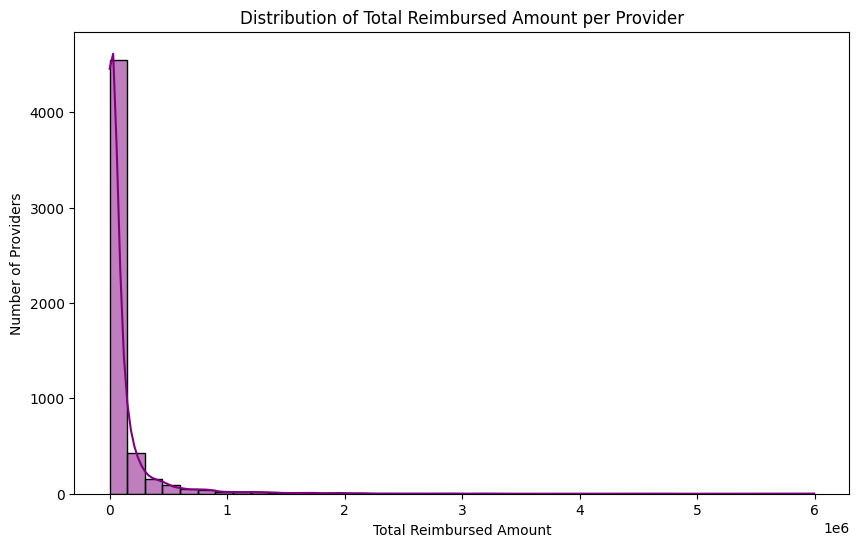

In [ ]:
# ============================================================
# CLAIM AMOUNT TRENDS — REIMBURSEMENT DISTRIBUTION
# ============================================================

plt.figure(figsize=(10, 6))
sns.histplot(
    provider_aggregated_df['total_reimbursed_amount'],
    bins=40,
    kde=True,
    color='purple'
)
plt.title('Distribution of Total Reimbursed Amount per Provider')
plt.xlabel('Total Reimbursed Amount')
plt.ylabel('Number of Providers')
plt.show()


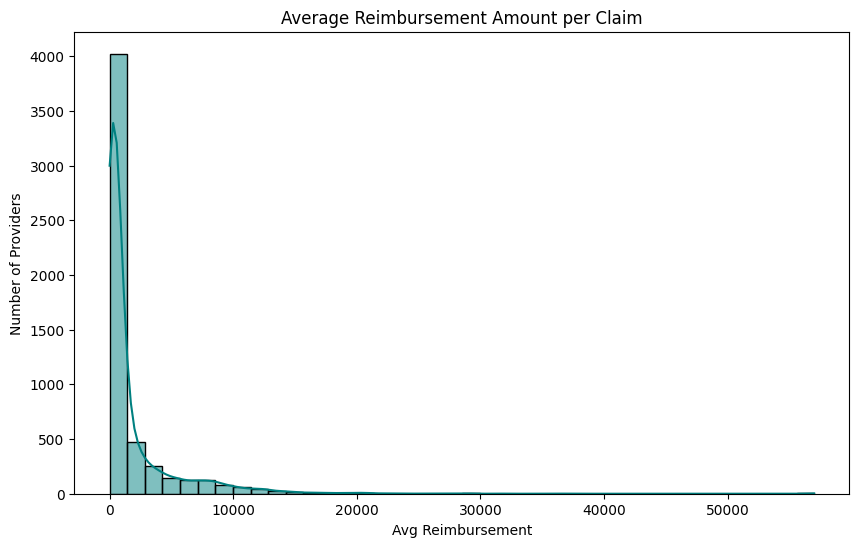

In [ ]:
# ============================================================
# AVERAGE REIMBURSEMENT PER CLAIM
# ============================================================

plt.figure(figsize=(10, 6))
sns.histplot(
    provider_aggregated_df['avg_reimbursed_amount_per_claim'],
    bins=40,
    kde=True,
    color='teal'
)
plt.title('Average Reimbursement Amount per Claim')
plt.xlabel('Avg Reimbursement')
plt.ylabel('Number of Providers')
plt.show()


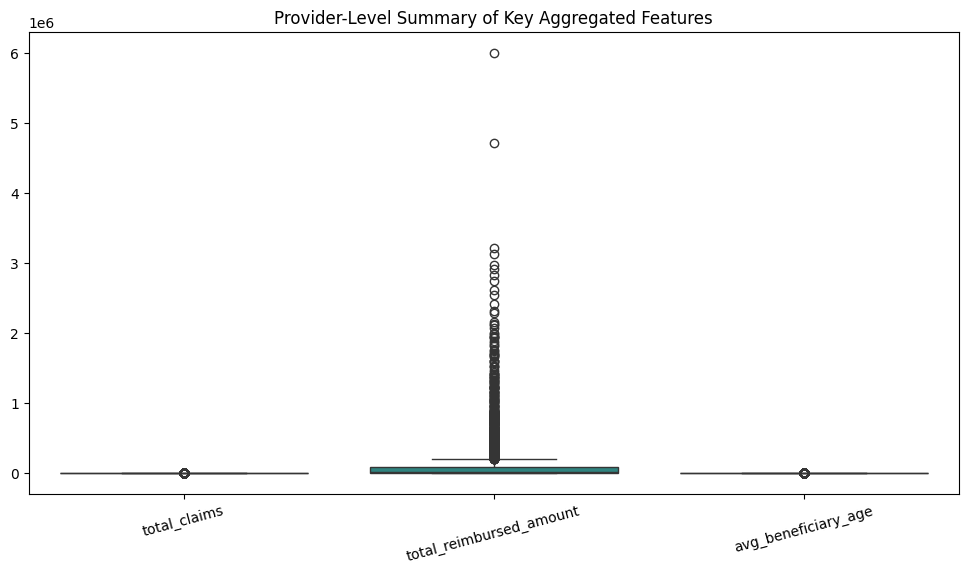

In [ ]:
# ============================================================
# PROVIDER-LEVEL SUMMARY — BOX PLOTS FOR KEY FEATURES
# ============================================================

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=provider_aggregated_df[['total_claims', 'total_reimbursed_amount', 'avg_beneficiary_age']],
    palette='viridis'
)
plt.title('Provider-Level Summary of Key Aggregated Features')
plt.xticks(rotation=15)
plt.show()


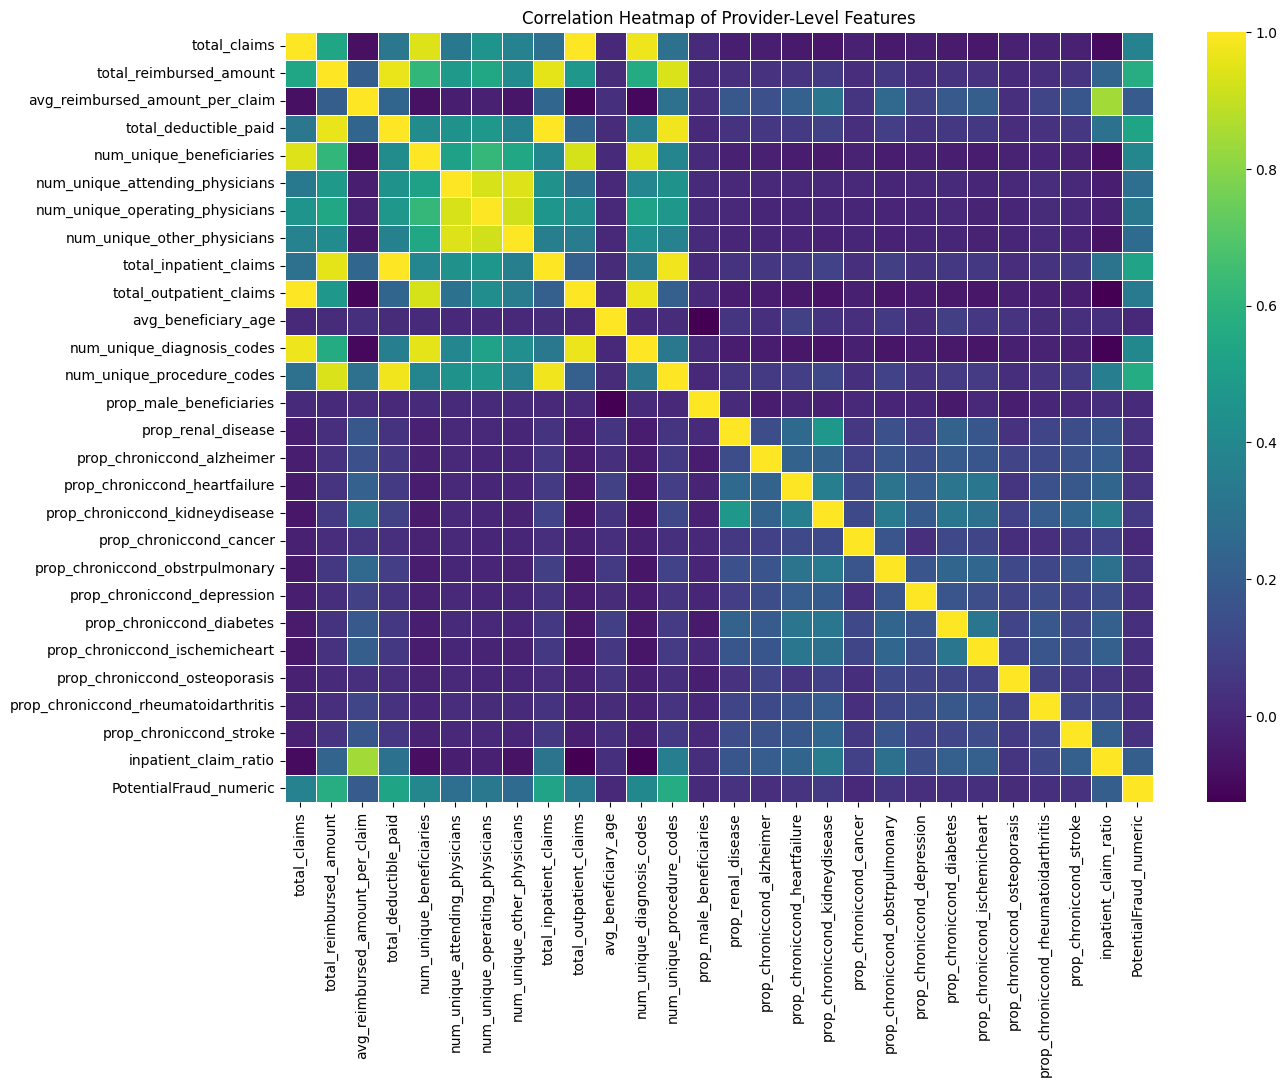

In [ ]:
# ============================================================
# CORRELATION HEATMAP OF PROVIDER FEATURES
# ============================================================

plt.figure(figsize=(14, 10))
corr_matrix = provider_aggregated_df.drop(columns=['Provider', 'PotentialFraud']).corr()

sns.heatmap(
    corr_matrix,
    cmap='viridis',
    annot=False,
    linewidths=0.5
)

plt.title('Correlation Heatmap of Provider-Level Features')
plt.show()


/tmp/ipython-input-1672856846.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


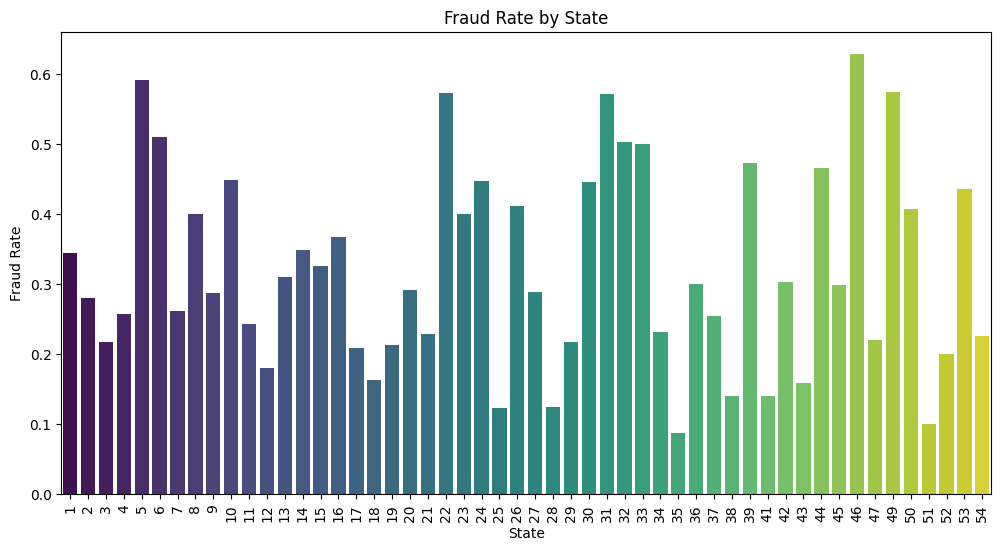

In [ ]:
# ============================================================
# GEOGRAPHIC PATTERNS — FRAUD RATE BY STATE
# ============================================================

state_fraud_rates = train_full_df.groupby('State')['PotentialFraud'].apply(
    lambda x: (x == 'Yes').mean()
).reset_index(name='FraudRate')

plt.figure(figsize=(12, 6))
sns.barplot(
    x='State',
    y='FraudRate',
    data=state_fraud_rates,
    palette='viridis'
)
plt.title('Fraud Rate by State')
plt.xticks(rotation=90)
plt.ylabel('Fraud Rate')
plt.show()


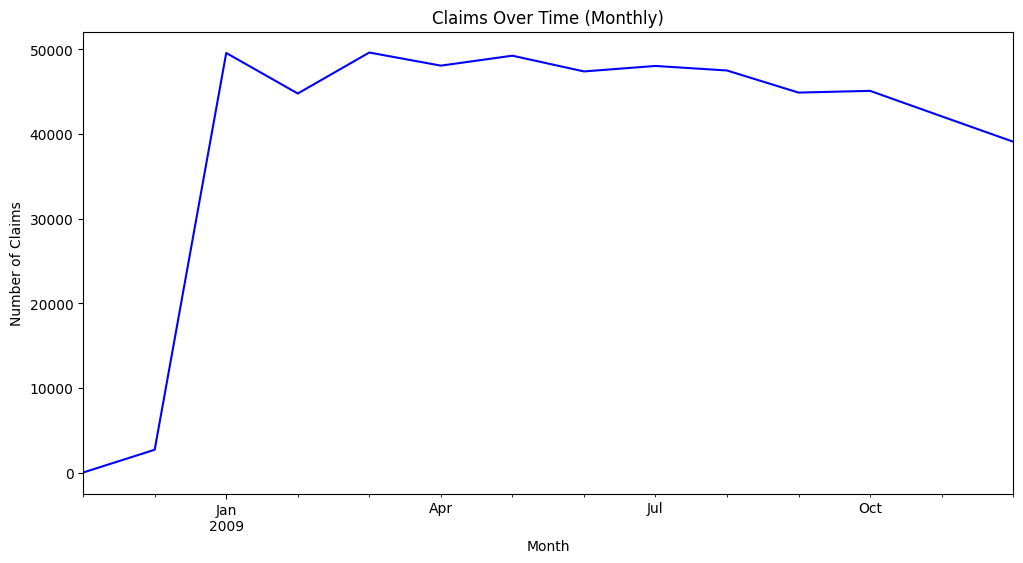

In [ ]:
# ============================================================
# TEMPORAL PATTERNS — CLAIM COUNT OVER TIME
# ============================================================

# Ensure ClaimStartDt is datetime
train_full_df['ClaimStartDt'] = pd.to_datetime(train_full_df['ClaimStartDt'], errors='coerce')

claims_over_time = train_full_df.groupby(train_full_df['ClaimStartDt'].dt.to_period('M'))['ClaimID'].count()

plt.figure(figsize=(12, 6))
claims_over_time.plot(kind='line', color='blue')
plt.title('Claims Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Claims')
plt.show()
